<a href="https://colab.research.google.com/github/heimmer/profile/blob/main/Case_Study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# import & pre-setting

In [1]:
# imports
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.options.display.max_rows=200
pd.options.display.max_columns=None


In [2]:
from google.colab import drive
drive.mount('/content/gdrive')
os.chdir("/content/gdrive/MyDrive/Colab Notebooks")

Mounted at /content/gdrive


In [3]:
excel_file_path = './agoda case dataset/Case_Study_Urgency_Message_Data.xlsx'
xls = pd.ExcelFile(excel_file_path)
# sheet_names = xls.sheet_names
# sheet_names
a = pd.read_excel(excel_file_path, sheet_name='City_A')
b = pd.read_excel(excel_file_path, sheet_name='City_B')
c = pd.read_excel(excel_file_path, sheet_name='City_C')
d = pd.read_excel(excel_file_path, sheet_name='City_D')
e = pd.read_excel(excel_file_path, sheet_name='City_E')

In [4]:
a.head()

,#,ADR_USD,hotel_id,city_id,star_rating,accommadation_type_name,chain_hotel,booking_date,checkin_date,checkout_date
0,1,71.06,297388,9395,2.5,Hotel,non-chain,2016-08-02,2016-10-01,2016-10-02
1,2,76.56,298322,9395,3.0,Hotel,non-chain,2016-08-02,2016-10-01,2016-10-02
2,3,153.88,2313076,9395,5.0,Hotel,chain,2016-08-02,2016-10-01,2016-10-02
3,4,126.60,2240838,9395,3.5,Hotel,non-chain,2016-08-04,2016-10-02,2016-10-03
4,5,115.08,2240838,9395,3.5,Hotel,non-chain,2016-08-04,2016-10-02,2016-10-03


In [5]:
a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22366 entries, 0 to 22365
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   #                        22366 non-null  int64         
 1   ADR_USD                  22366 non-null  float64       
 2   hotel_id                 22366 non-null  int64         
 3   city_id                  22366 non-null  int64         
 4   star_rating              22366 non-null  float64       
 5   accommadation_type_name  22366 non-null  object        
 6   chain_hotel              22366 non-null  object        
 7   booking_date             22366 non-null  datetime64[ns]
 8   checkin_date             22366 non-null  datetime64[ns]
 9   checkout_date            22366 non-null  datetime64[ns]
dtypes: datetime64[ns](3), float64(2), int64(3), object(2)
memory usage: 1.7+ MB


# data integration

## data cleasing

In [6]:
#column name check
all = [b,c,d,e]
for i,name in enumerate(a.columns):
  for j,item in enumerate(all):
    if item.columns[i]!=name:
      print('The column name {} of the {} dataframe is different from dataframe_a ({}).'.format(item.columns[i],j,name))

The column name accommodation_type_name of the 1 dataframe is different from dataframe_a (accommadation_type_name).
The column name accommodation_type_name of the 2 dataframe is different from dataframe_a (accommadation_type_name).
The column name accommodation_type_name of the 3 dataframe is different from dataframe_a (accommadation_type_name).


In [7]:
a = a.rename(columns={'accommadation_type_name':'accommodation_type_name'})
b = b.rename(columns={'accommadation_type_name':'accommodation_type_name'})

## detailed data table

In [8]:
def construct_dataset(df_read,city_name):
  df = df_read.copy()
  df['days_book_in_advance'] = (df['checkin_date'] - df['booking_date']).dt.days
  df['weeks_book_in_advance'] = df['days_book_in_advance']//7+1
  df['stay_nights'] = (df['checkout_date'] - df['checkin_date']).dt.days
  df['booking_dow'] = df['booking_date'].dt.dayofweek+1
  df['checkin_dow'] = df['checkin_date'].dt.dayofweek+1
  df['city'] = city_name
  df = df.drop(['city_id','#'],axis=1)

  def star_map(value):
    if value <3:
      return 'low'
    elif value>=3 and value<4:
      return 'medium'
    elif value>=4:
      return 'high'
    else: return 'NA'
  df['star_type'] = df['star_rating'].apply(star_map)
  df['revenue'] = df['ADR_USD']*df['stay_nights']


  return df

In [9]:
desired_columns_order = a.columns
all_df = pd.concat([construct_dataset(a[desired_columns_order],'A')
            ,construct_dataset(b[desired_columns_order],'B')
            ,construct_dataset(c[desired_columns_order],'C')
            ,construct_dataset(d[desired_columns_order],'D')
            ,construct_dataset(e[desired_columns_order],'E')]
          , ignore_index=True).reset_index().rename(columns={'index':'order_id'})
all_df

,order_id,ADR_USD,hotel_id,star_rating,accommodation_type_name,chain_hotel,booking_date,checkin_date,checkout_date,days_book_in_advance,weeks_book_in_advance,stay_nights,booking_dow,checkin_dow,city,star_type,revenue
0,0,71.060000,297388,2.5,Hotel,non-chain,2016-08-02,2016-10-01,2016-10-02,60,9,1,2,6,A,low,71.06
1,1,76.560000,298322,3.0,Hotel,non-chain,2016-08-02,2016-10-01,2016-10-02,60,9,1,2,6,A,medium,76.56
2,2,153.880000,2313076,5.0,Hotel,chain,2016-08-02,2016-10-01,2016-10-02,60,9,1,2,6,A,high,153.88
3,3,126.600000,2240838,3.5,Hotel,non-chain,2016-08-04,2016-10-02,2016-10-03,59,9,1,4,7,A,medium,126.60
4,4,115.080000,2240838,3.5,Hotel,non-chain,2016-08-04,2016-10-02,2016-10-03,59,9,1,4,7,A,medium,115.08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49059,49059,72.580000,130890,4.0,Hotel,non-chain,2016-12-31,2016-12-31,2017-01-02,0,1,2,6,6,E,high,145.16
49060,49060,70.020000,130890,4.0,Hotel,non-chain,2016-12-31,2016-12-31,2017-01-01,0,1,1,6,6,E,high,70.02
49061,49061,921.260000,21720,5.0,Resort,non-chain,2016-12-31,2016-12-31,2017-01-01,0,1,1,6,6,E,high,921.26
49062,49062,345.086667,21720,5.0,Resort,non-chain,2016-12-31,2016-12-31,2017-01-03,0,1,3,6,6,E,high,1035.26


In [ ]:
all_df.groupby(['hotel_id','checkin_date','star_rating','accommodation_type_name','chain_hotel']).agg({
   'order_id':'count'
   ,'stay_nights'
   ,
})

In [33]:
groupby = ['hotel_id','star_rating','accommodation_type_name','chain_hotel','checkin_date']
agg = {
    'order_id':'count'
   ,'stay_nights':'sum'
   ,'revenue':'sum'
}
hotel_checkindate = agg_func(all_df,groupby,agg)
hotel_checkindate.head()


,hotel_id,star_rating,accommodation_type_name,chain_hotel,checkin_date,order_id_count,stay_nights_sum,revenue_sum
0,770,4.0,Hotel,chain,2016-10-01,2,5,907.200
1,770,4.0,Hotel,chain,2016-10-03,3,8,1251.615
2,770,4.0,Hotel,chain,2016-10-06,3,6,1108.060
3,770,4.0,Hotel,chain,2016-10-07,1,3,474.240
4,770,4.0,Hotel,chain,2016-10-10,1,3,700.740


In [37]:
hotel_checkindate['max_capability'] = hotel_checkindate.groupby('hotel_id')['order_id_count'].transform('max')
hotel_checkindate['hotness_index'] = hotel_checkindate['order_id_count']/hotel_checkindate['max_capability']
hotel_checkindate.head()


,hotel_id,star_rating,accommodation_type_name,chain_hotel,checkin_date,order_id_count,stay_nights_sum,revenue_sum,max_capability,hotness_index
0,770,4.0,Hotel,chain,2016-10-01,2,5,907.200,5,0.4
1,770,4.0,Hotel,chain,2016-10-03,3,8,1251.615,5,0.6
2,770,4.0,Hotel,chain,2016-10-06,3,6,1108.060,5,0.6
3,770,4.0,Hotel,chain,2016-10-07,1,3,474.240,5,0.2
4,770,4.0,Hotel,chain,2016-10-10,1,3,700.740,5,0.2


## [del] aggregated data table

## helper_function

In [10]:
def agg_func(df,groupby,agg,subgroup_pct=None):
  agg_df = df.groupby(groupby).agg(agg).reset_index()
  agg_df.columns = groupby + ['{}_{}'.format(key,value) for key,value in agg.items()]
  if subgroup_pct == None:
    return agg_df
  else:
    for key,value in subgroup_pct['percentage'].items():
      agg_df['{}_{}_pct'.format(key,value)] = agg_df['{}_{}'.format(key,value)] / agg_df.groupby(subgroup_pct['group'])['{}_{}'.format(key,value)].transform('sum')
    return agg_df

# Price movement

## general price decrease

   days_book_in_advance  ADR_USD_mean  order_id_count   revenue_sum  \
0                    -1     83.933333               3  2.518000e+02   
1                     0    119.274947            5603  8.838099e+05   
2                     1    126.904330            5666  1.101039e+06   
3                     2    134.063562            2962  6.318975e+05   
4                     3    139.460603            2430  5.537220e+05   

   stay_nights_sum     avg_adr  
0                3   83.933333  
1             7373  119.871136  
2             8691  126.687311  
3             4629  136.508417  
4             3912  141.544481  


<Axes: xlabel='days_book_in_advance', ylabel='avg_adr'>

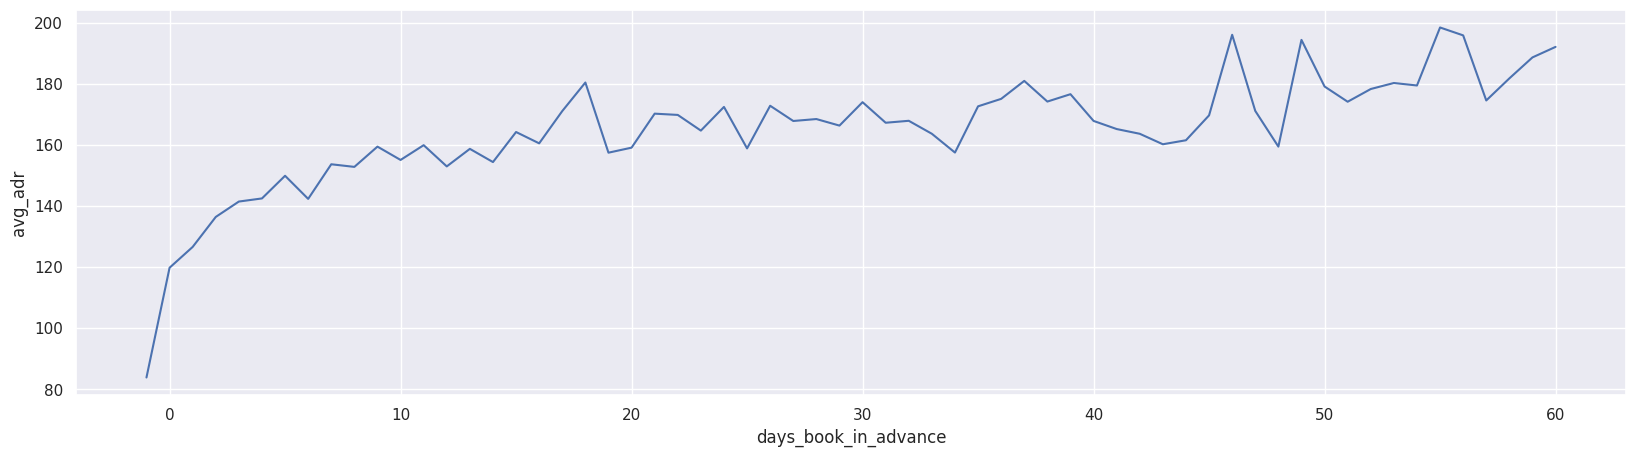

In [ ]:
groupby = ['days_book_in_advance']
agg = {
    'ADR_USD':'mean'
    ,'order_id':'count'
    ,'revenue':'sum'
    ,'stay_nights':'sum'
}

cohort = agg_func(all_df,groupby,agg)
# cohort.pivot(index='weeks_book_in_advance',colunm='city',values='')
cohort['avg_adr']=cohort['revenue_sum']/cohort['stay_nights_sum']
print(cohort.head())

sns.lineplot(data=cohort,x='days_book_in_advance',y='avg_adr')

想看不同热度的入住日期，价格趋势是否会有差异。证明没有

   days_book_in_advance  ADR_USD_mean  order_id_count    revenue_sum  \
0                    -1     74.300000               1      74.300000   
1                     0    129.339106             917  164614.530000   
2                     1    135.625081             941  201836.776667   
3                     2    130.596906             488  105724.440000   
4                     3    152.316549             480  119607.210000   

   stay_nights_sum     avg_adr  
0                1   74.300000  
1             1273  129.312278  
2             1471  137.210589  
3              794  133.154207  
4              786  152.172023  


<Axes: xlabel='days_book_in_advance', ylabel='avg_adr'>

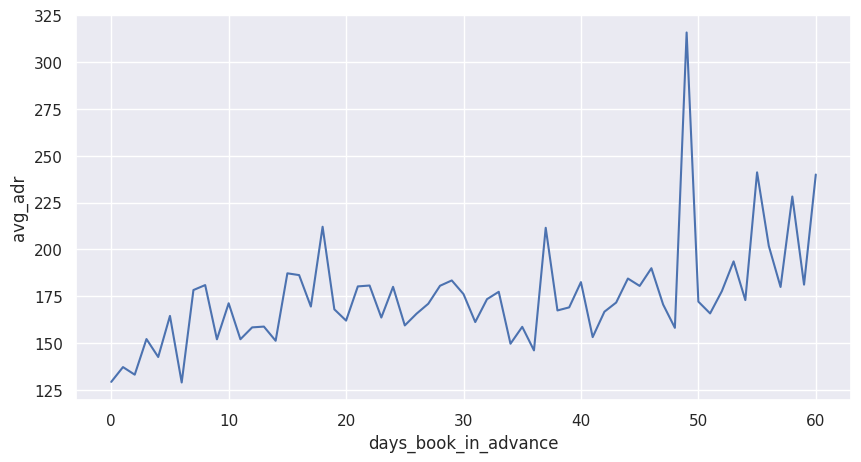

In [63]:
groupby = ['days_book_in_advance']
agg = {
    'ADR_USD':'mean'
    ,'order_id':'count'
    ,'revenue':'sum'
    ,'stay_nights':'sum'
}

cohort = agg_func(all_df[all_df['checkin_dow']==5],groupby,agg)
# cohort.pivot(index='weeks_book_in_advance',colunm='city',values='')
cohort['avg_adr']=cohort['revenue_sum']/cohort['stay_nights_sum']
print(cohort.head())

sns.set_context({"figure.figsize": (10, 5)})
sns.set_style('darkgrid')
sns.lineplot(data=cohort[cohort['days_book_in_advance']!=-1],x='days_book_in_advance',y='avg_adr')

## City D has different trend

  city  days_book_in_advance  ADR_USD_mean  order_id_count    revenue_sum  \
0    A                    -1    148.980000               1     148.980000   
1    A                     0     91.398522            2901  361113.890000   
2    A                     1     94.288202            2864  425402.820000   
3    A                     2     94.362392            1434  219561.360000   
4    A                     3    100.084396            1188  198143.639524   

   stay_nights_sum     avg_adr  
0                1  148.980000  
1             3853   93.722785  
2             4375   97.234930  
3             2223   98.768043  
4             1913  103.577438  


<Axes: xlabel='days_book_in_advance', ylabel='avg_adr'>

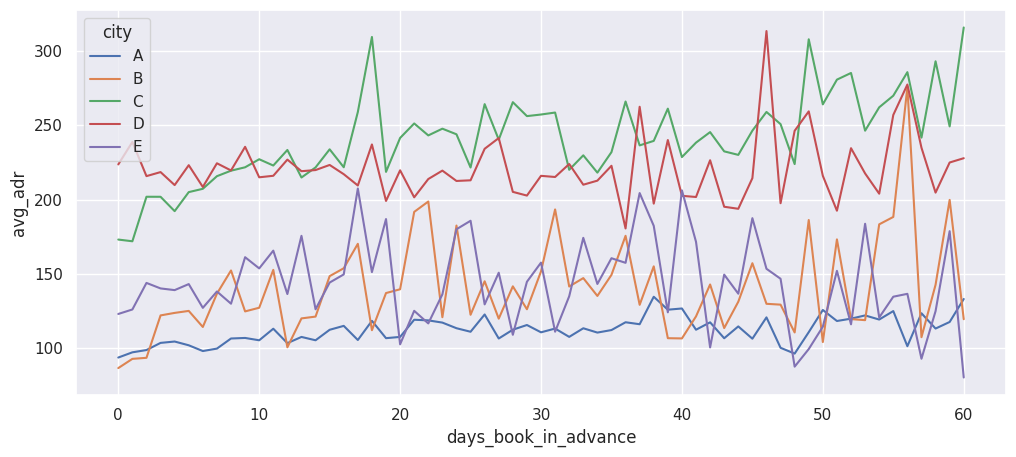

In [65]:
groupby = ['city','days_book_in_advance']
agg = {
    'ADR_USD':'mean'
    ,'order_id':'count'
    ,'revenue':'sum'
    ,'stay_nights':'sum'
}

cohort = agg_func(all_df,groupby,agg)
# cohort.pivot(index='weeks_book_in_advance',colunm='city',values='')
cohort['avg_adr']=cohort['revenue_sum']/cohort['stay_nights_sum']
print(cohort.head())

sns.set_context({"figure.figsize": (12, 5)})
sns.set_style('darkgrid')
sns.lineplot(data=cohort[cohort['days_book_in_advance']!=-1],x='days_book_in_advance',y='avg_adr',hue='city')

## why - hotel type?

In [69]:
groupby = ['city','accommodation_type_name']
agg = {
    'ADR_USD':'mean'
    ,'order_id':'count'
    ,'revenue':'sum'
    ,'hotel_id':'nunique'
}
subgroup_pct = {
    'group':['city']
    ,'percentage':{'hotel_id':'nunique','order_id':'count','revenue':'sum'}
}
city_hotel_type = agg_func(all_df,groupby,agg,subgroup_pct)
city_hotel_type.head()

,city,accommodation_type_name,ADR_USD_mean,order_id_count,revenue_sum,hotel_id_nunique,hotel_id_nunique_pct,order_id_count_pct,revenue_sum_pct
0,A,Apartment,57.366471,51,5.003340e+03,8,0.037559,0.002280,0.001284
1,A,Guest House / Bed & Breakfast,80.247064,520,6.221427e+04,20,0.093897,0.023250,0.015961
2,A,Hostel,40.682284,1002,6.650724e+04,31,0.145540,0.044800,0.017062
3,A,Hotel,105.812501,18398,3.390222e+06,108,0.507042,0.822588,0.869743
4,A,Motel,28.067284,27,9.995200e+02,2,0.009390,0.001207,0.000256


(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'A'),
  Text(1, 0, 'B'),
  Text(2, 0, 'C'),
  Text(3, 0, 'D'),
  Text(4, 0, 'E')])

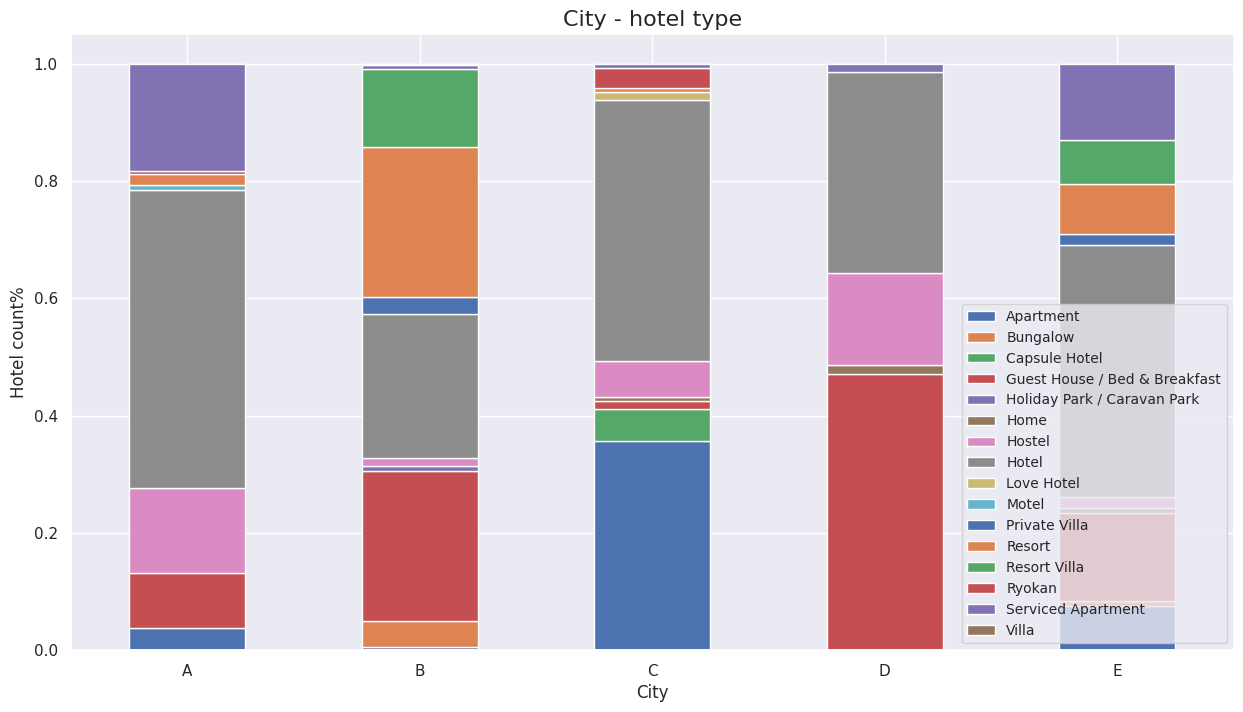

In [77]:

pivot = city_hotel_type.pivot(index='city',columns='accommodation_type_name',values='hotel_id_nunique_pct')

sns.set(style='darkgrid')
sns.set_context({"figure.figsize": (15, 8)})

pivot.reset_index().set_index('city').plot(kind='bar', stacked=True)

plt.title('City - hotel type', fontsize=16)

#add axis titles
plt.xlabel('City')
plt.ylabel('Hotel count%')
plt.legend(loc='lower right',fontsize=10)

#rotate x-axis labels
# plt.xticks(rotation=0)

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'A'),
  Text(1, 0, 'B'),
  Text(2, 0, 'C'),
  Text(3, 0, 'D'),
  Text(4, 0, 'E')])

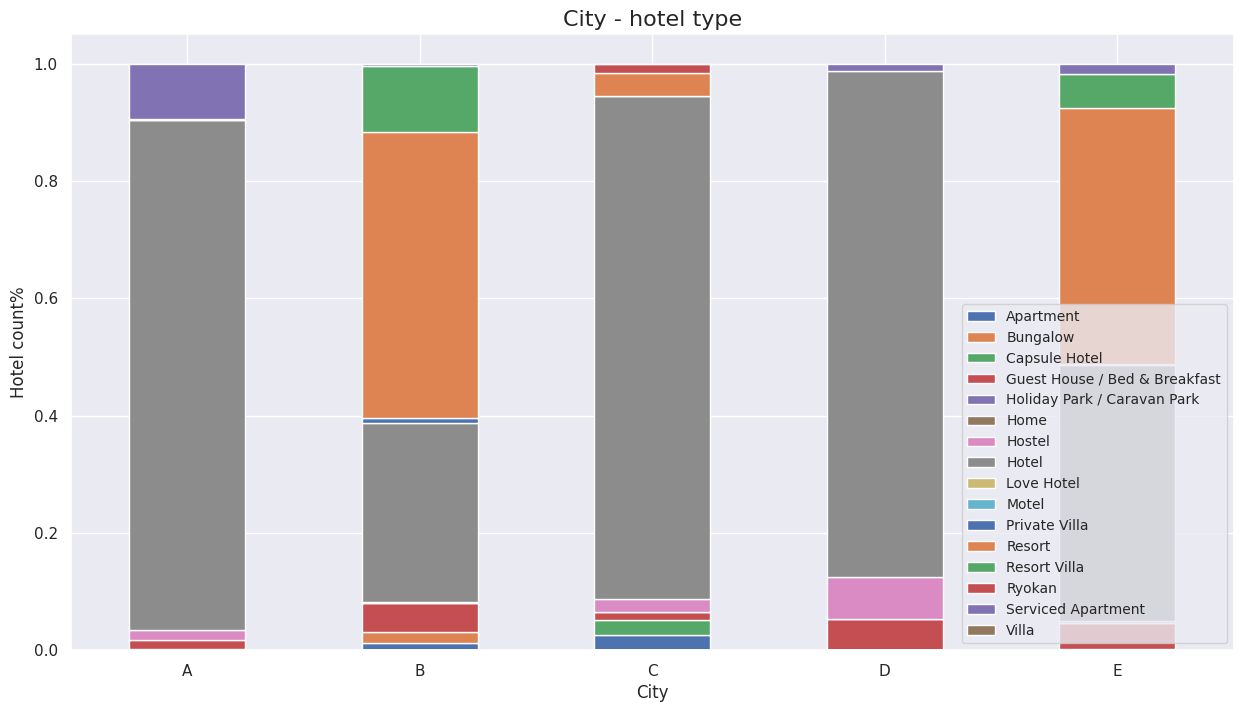

In [80]:
pivot = city_hotel_type.pivot(index='city',columns='accommodation_type_name',values='revenue_sum_pct')

sns.set(style='darkgrid')
sns.set_context({"figure.figsize": (15, 8)})

pivot.reset_index().set_index('city').plot(kind='bar', stacked=True)

plt.title('City - hotel type', fontsize=16)

#add axis titles
plt.xlabel('City')
plt.ylabel('Hotel count%')
plt.legend(loc='lower right',fontsize=10)

#rotate x-axis labels
plt.xticks(rotation=0)

## why - star?

In [81]:
groupby = ['city','star_type']
agg = {
    'ADR_USD':'mean'
    ,'order_id':'count'
    ,'revenue':'sum'
    ,'hotel_id':'nunique'
}
subgroup_pct = {
    'group':['city']
    ,'percentage':{'hotel_id':'nunique','order_id':'count','revenue':'sum'}
}
city_star = agg_func(all_df,groupby,agg,subgroup_pct)
city_star.head()

,city,star_type,ADR_USD_mean,order_id_count,revenue_sum,hotel_id_nunique,hotel_id_nunique_pct,order_id_count_pct,revenue_sum_pct
0,A,high,150.427519,9475,2.575193e+06,44,0.206573,0.423634,0.660651
1,A,low,53.298228,3079,2.840182e+05,80,0.375587,0.137664,0.072863
2,A,medium,67.118446,9812,1.038749e+06,89,0.417840,0.438702,0.266485
3,B,high,175.900519,2252,7.442755e+05,97,0.281977,0.456610,0.687498
4,B,low,49.226429,702,6.263271e+04,114,0.331395,0.142336,0.057855


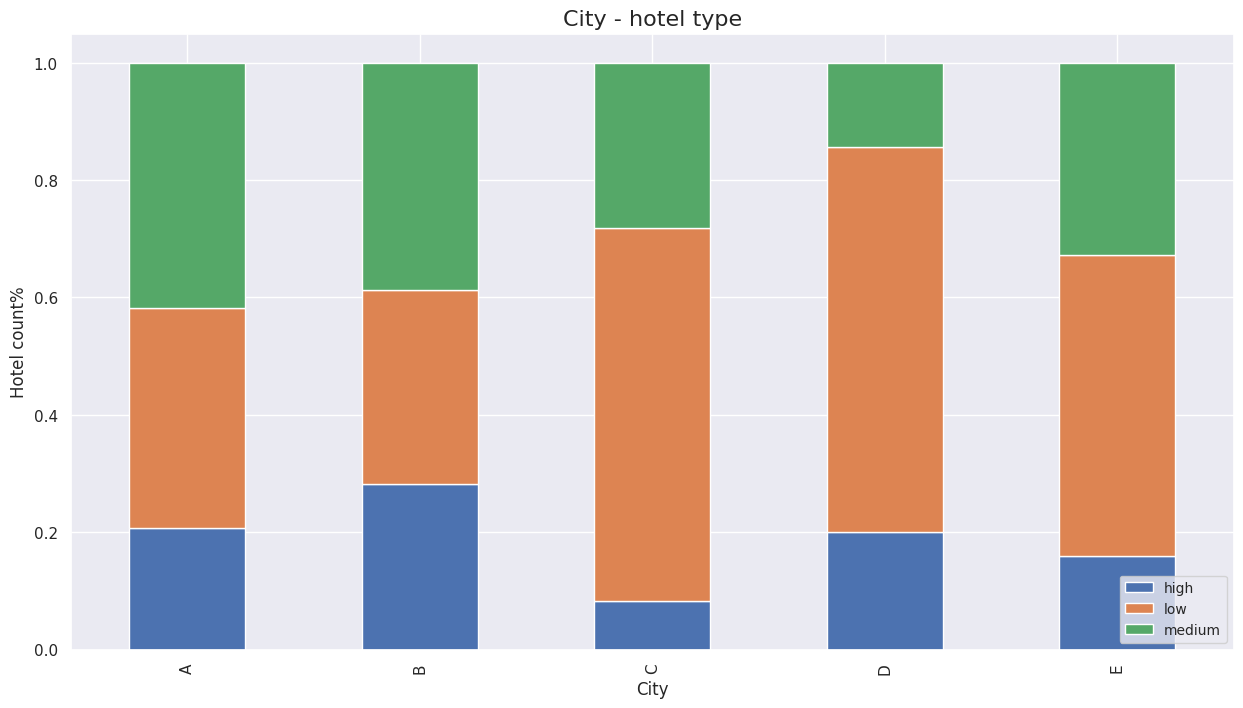

In [83]:
pivot = city_star.pivot(index='city',columns='star_type',values='hotel_id_nunique_pct')

sns.set(style='darkgrid')
sns.set_context({"figure.figsize": (15, 8)})

pivot.reset_index().set_index('city').plot(kind='bar', stacked=True)

plt.title('City - hotel type', fontsize=16)

#add axis titles
plt.xlabel('City')
plt.ylabel('Hotel count%')
plt.legend(loc='lower right',fontsize=10)

#rotate x-axis labels
# plt.xticks(rotation=0)

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'A'),
  Text(1, 0, 'B'),
  Text(2, 0, 'C'),
  Text(3, 0, 'D'),
  Text(4, 0, 'E')])

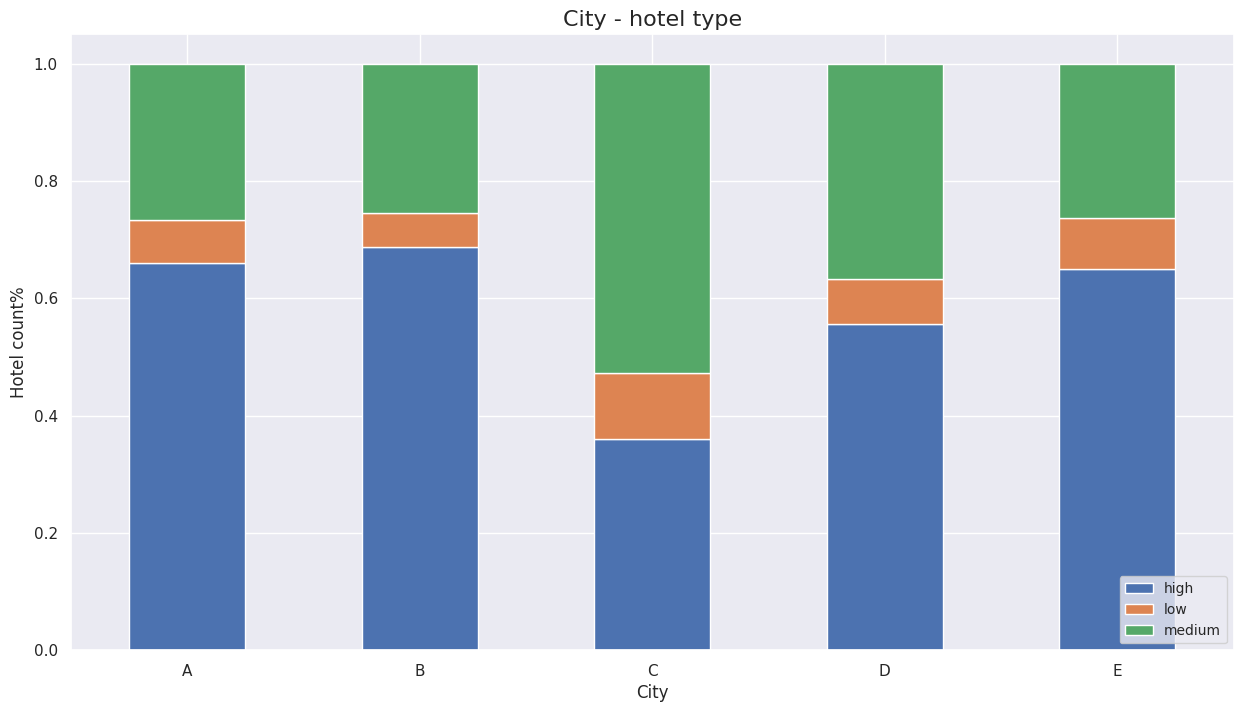

In [84]:
pivot = city_star.pivot(index='city',columns='star_type',values='revenue_sum_pct')

sns.set(style='darkgrid')
sns.set_context({"figure.figsize": (15, 8)})

pivot.reset_index().set_index('city').plot(kind='bar', stacked=True)

plt.title('City - hotel type', fontsize=16)

#add axis titles
plt.xlabel('City')
plt.ylabel('Hotel count%')
plt.legend(loc='lower right',fontsize=10)

#rotate x-axis labels
plt.xticks(rotation=0)

# others

## City yield



1.   City A doesn't have the most hotels but have the highest order volume.  
2.   City B have the mose hotels but have lowest order volume.
3.   City D have the least hotels but order volume is the second highest.  
4.   C&D have high-value hotels.




In [11]:
groupby = ['city']
agg = {
    'hotel_id':'nunique'
    ,'ADR_USD':'mean'
    ,'order_id':'count'
    ,'revenue':'sum'
}
city = agg_func(all_df,groupby,agg)
city


,city,hotel_id_nunique,ADR_USD_mean,order_id_count,revenue_sum
0,A,213,100.508458,22366,3.897959e+06
1,B,344,118.318520,4932,1.082585e+06
2,C,146,224.839426,6797,2.752435e+06
3,D,70,218.848177,10152,3.760328e+06
4,E,107,142.068498,4817,1.059257e+06


In [12]:
groupby = ['city','star_type']
agg = {
    'hotel_id':'nunique'
    ,'ADR_USD':'mean'
    ,'order_id':'count'
    ,'revenue':'sum'
}
subgroup_pct = {
    'group':['city']
    ,'percentage':{'hotel_id':'nunique','order_id':'count','revenue':'sum'}
}
city_star = agg_func(all_df,groupby,agg,subgroup_pct)
city_star

,city,star_type,hotel_id_nunique,ADR_USD_mean,order_id_count,revenue_sum,hotel_id_nunique_pct,order_id_count_pct,revenue_sum_pct
0,A,high,44,150.427519,9475,2.575193e+06,0.206573,0.423634,0.660651
1,A,low,80,53.298228,3079,2.840182e+05,0.375587,0.137664,0.072863
2,A,medium,89,67.118446,9812,1.038749e+06,0.417840,0.438702,0.266485
3,B,high,97,175.900519,2252,7.442755e+05,0.281977,0.456610,0.687498
4,B,low,114,49.226429,702,6.263271e+04,0.331395,0.142336,0.057855
5,B,medium,133,77.281100,1978,2.756767e+05,0.386628,0.401054,0.254647
6,C,high,12,503.332363,1108,9.934155e+05,0.082192,0.163013,0.360922
7,C,low,93,92.210500,1996,3.093606e+05,0.636986,0.293659,0.112395
8,C,medium,41,212.967551,3693,1.449659e+06,0.280822,0.543328,0.526682
9,D,high,14,274.573803,4594,2.088635e+06,0.200000,0.452522,0.555440


## By hotel type

In [13]:
groupby = ['accommodation_type_name']
agg = {
    'hotel_id':'nunique'
    ,'ADR_USD':'mean'
    ,'order_id':'count'
    ,'revenue':'sum'
}
hotel_type = agg_func(all_df,groupby,agg).sort_values(by='hotel_id_nunique',ascending=False)
hotel_type


,accommodation_type_name,hotel_id_nunique,ADR_USD_mean,order_id_count,revenue_sum
7,Hotel,327,158.130377,35441,9.786907e+06
3,Guest House / Bed & Breakfast,159,85.763141,2758,3.947205e+05
11,Resort,102,190.981311,3525,1.099495e+06
0,Apartment,70,196.309749,239,9.161767e+04
6,Hostel,58,88.781364,2774,4.021480e+05
14,Serviced Apartment,57,90.070825,2797,4.359708e+05
12,Resort Villa,54,259.492543,397,1.840585e+05
1,Bungalow,16,71.865798,142,2.024896e+04
10,Private Villa,12,338.963333,18,1.056336e+04
2,Capsule Hotel,8,61.312571,822,7.346635e+04


In [14]:
groupby = ['city','accommodation_type_name']
agg = {
    'hotel_id':'nunique'
    ,'ADR_USD':'mean'
    ,'order_id':'count'
    ,'revenue':'sum'
}
subgroup_pct = {
    'group':['city']
    ,'percentage':{'hotel_id':'nunique','order_id':'count','revenue':'sum'}
}
hotel_type = agg_func(all_df,groupby,agg,subgroup_pct).sort_values(by=groupby,ascending=False)
hotel_type


,city,accommodation_type_name,hotel_id_nunique,ADR_USD_mean,order_id_count,revenue_sum,hotel_id_nunique_pct,order_id_count_pct,revenue_sum_pct
43,E,Serviced Apartment,14,38.489558,302,1.970389e+04,0.130841,0.062695,0.018602
42,E,Resort Villa,8,419.176156,98,6.113075e+04,0.074766,0.020345,0.057711
41,E,Resort,9,222.371113,1436,4.614835e+05,0.084112,0.298111,0.435667
40,E,Private Villa,2,309.260000,3,1.938280e+03,0.018692,0.000623,0.001830
39,E,Hotel,46,109.394939,2540,4.614114e+05,0.429907,0.527299,0.435599
38,E,Hostel,2,30.008419,78,3.802360e+03,0.018692,0.016193,0.003590
37,E,Home,1,140.560000,1,1.405600e+02,0.009346,0.000208,0.000133
36,E,Guest House / Bed & Breakfast,16,86.597229,341,4.737970e+04,0.149533,0.070791,0.044729
35,E,Bungalow,1,26.980000,1,2.698000e+01,0.009346,0.000208,0.000025
34,E,Apartment,8,87.479412,17,2.239820e+03,0.074766,0.003529,0.002115


In [15]:
all_df.groupby('chain_hotel').agg({'hotel_id':'nunique'
        ,'ADR_USD':'mean'
        ,'booking_date':'count'
        ,'revenue':'sum'
        }
        ).sort_values(by='hotel_id',ascending=False)

,hotel_id,ADR_USD,booking_date,revenue
chain_hotel,,,,
non-chain,725,128.842094,35827,7.930654e+06
chain,155,200.182642,13237,4.621910e+06


## By booking dayofweek

In [16]:
all_df.head()

,order_id,ADR_USD,hotel_id,star_rating,accommodation_type_name,chain_hotel,booking_date,checkin_date,checkout_date,days_book_in_advance,weeks_book_in_advance,stay_nights,booking_dow,checkin_dow,city,star_type,revenue
0,0,71.06,297388,2.5,Hotel,non-chain,2016-08-02,2016-10-01,2016-10-02,60,9,1,2,6,A,low,71.06
1,1,76.56,298322,3.0,Hotel,non-chain,2016-08-02,2016-10-01,2016-10-02,60,9,1,2,6,A,medium,76.56
2,2,153.88,2313076,5.0,Hotel,chain,2016-08-02,2016-10-01,2016-10-02,60,9,1,2,6,A,high,153.88
3,3,126.60,2240838,3.5,Hotel,non-chain,2016-08-04,2016-10-02,2016-10-03,59,9,1,4,7,A,medium,126.60
4,4,115.08,2240838,3.5,Hotel,non-chain,2016-08-04,2016-10-02,2016-10-03,59,9,1,4,7,A,medium,115.08


   booking_dow  hotel_id_nunique  ADR_USD_mean  order_id_count   revenue_sum
0            1               587    148.770784            7510  1.969672e+06
1            2               602    148.518105            7568  1.965379e+06
2            3               592    148.984852            7440  1.916383e+06
3            4               571    151.602440            7352  1.914405e+06
4            5               589    149.851255            7071  1.805663e+06
5            6               559    144.626899            6019  1.469864e+06
6            7               565    142.767656            6104  1.511199e+06


<Axes: xlabel='booking_dow', ylabel='ADR_USD_mean'>

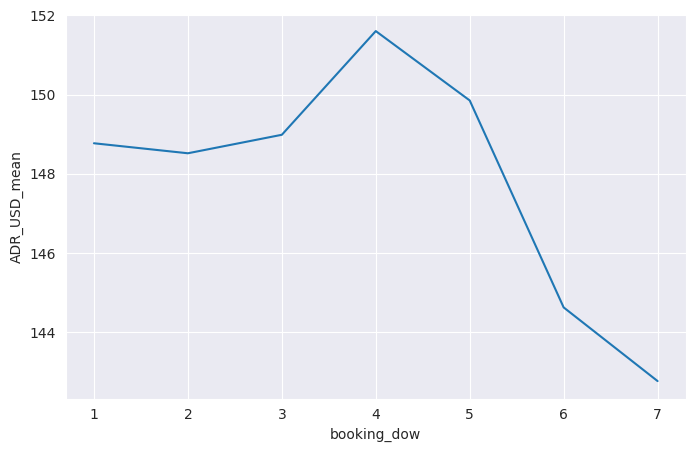

In [17]:
groupby = ['booking_dow']
agg = {
    'hotel_id':'nunique'
    ,'ADR_USD':'mean'
    ,'order_id':'count'
    ,'revenue':'sum'
}

booking_dow = agg_func(all_df,groupby,agg)
print(booking_dow)

sns.set_context({"figure.figsize": (8, 5)})
sns.set_style('darkgrid')
sns.lineplot(data=booking_dow,x='booking_dow',y='ADR_USD_mean')

<Axes: xlabel='booking_dow', ylabel='order_id_count'>

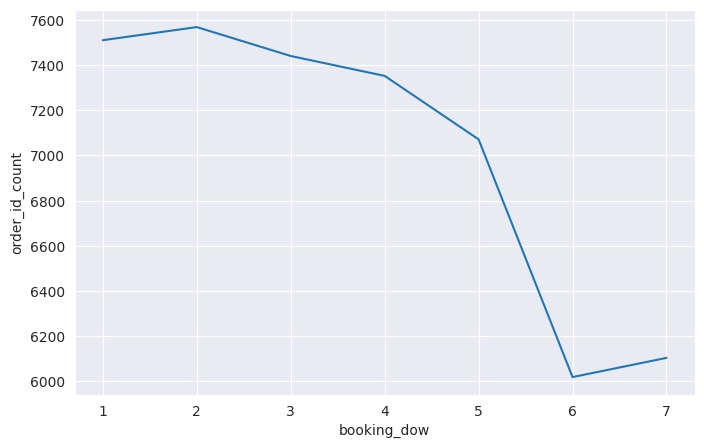

In [18]:
sns.lineplot(data=booking_dow,x='booking_dow',y='order_id_count')

## By advance booking days

In [19]:
all_df.head()

,order_id,ADR_USD,hotel_id,star_rating,accommodation_type_name,chain_hotel,booking_date,checkin_date,checkout_date,days_book_in_advance,weeks_book_in_advance,stay_nights,booking_dow,checkin_dow,city,star_type,revenue
0,0,71.06,297388,2.5,Hotel,non-chain,2016-08-02,2016-10-01,2016-10-02,60,9,1,2,6,A,low,71.06
1,1,76.56,298322,3.0,Hotel,non-chain,2016-08-02,2016-10-01,2016-10-02,60,9,1,2,6,A,medium,76.56
2,2,153.88,2313076,5.0,Hotel,chain,2016-08-02,2016-10-01,2016-10-02,60,9,1,2,6,A,high,153.88
3,3,126.60,2240838,3.5,Hotel,non-chain,2016-08-04,2016-10-02,2016-10-03,59,9,1,4,7,A,medium,126.60
4,4,115.08,2240838,3.5,Hotel,non-chain,2016-08-04,2016-10-02,2016-10-03,59,9,1,4,7,A,medium,115.08


    days_book_in_advance  hotel_amt         ADR  order_amt       revenue
0                      0        552  119.274947       5603  8.838099e+05
1                      1        557  126.904330       5666  1.101039e+06
2                      2        448  134.063562       2962  6.318975e+05
3                      3        409  139.460603       2430  5.537220e+05
4                      4        371  138.774256       2050  4.798747e+05
5                      5        352  148.217584       1763  4.255021e+05
6                      6        335  140.577476       1585  3.732786e+05
7                      7        312  150.129580       1420  3.653149e+05
8                      8        308  152.810496       1277  3.271942e+05
9                      9        298  156.190370       1210  3.169906e+05
10                    10        282  151.646822       1070  2.892328e+05
11                    11        270  156.743437       1016  2.832046e+05
12                    12        276  147.406670    

<Axes: xlabel='days_book_in_advance', ylabel='ADR'>

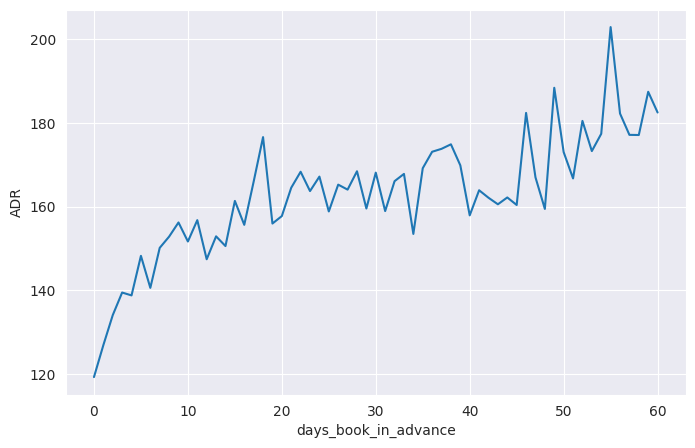

In [20]:
advance_booking_days = all_df[all_df['days_book_in_advance']!=-1].groupby('days_book_in_advance').agg({'hotel_id':'nunique'
                  ,'ADR_USD':'mean'
                  ,'booking_date':'count'
                  ,'revenue':'sum'
                  }
                  ).reset_index()
advance_booking_days.columns=['days_book_in_advance','hotel_amt','ADR','order_amt','revenue']
print(advance_booking_days)

sns.set_style('darkgrid')
sns.lineplot(data=advance_booking_days,x='days_book_in_advance',y='ADR')

# User perspective

# Hotel perspective

## different hotel type， different booking pattern

In [22]:
all_df.columns

Index(['order_id', 'ADR_USD', 'hotel_id', 'star_rating',
       'accommodation_type_name', 'chain_hotel', 'booking_date',
       'checkin_date', 'checkout_date', 'days_book_in_advance',
       'weeks_book_in_advance', 'stay_nights', 'booking_dow', 'checkin_dow',
       'city', 'star_type', 'revenue'],
      dtype='object')

In [23]:
groupby = ['accommodation_type_name','weeks_book_in_advance']
agg = {
    'ADR_USD':'mean'
    ,'order_id':'count'
    ,'revenue':'sum'
}
subgroup_pct = {
    'group':['accommodation_type_name']
    ,'percentage':{'order_id':'count','revenue':'sum'}
}
type_weeksadvance = agg_func(all_df,groupby,agg,subgroup_pct)
type_weeksadvance.head()

,accommodation_type_name,weeks_book_in_advance,ADR_USD_mean,order_id_count,revenue_sum,order_id_count_pct,revenue_sum_pct
0,Apartment,1,137.451042,80,21333.92,0.334728,0.232858
1,Apartment,2,215.698269,52,20489.26,0.217573,0.223639
2,Apartment,3,228.309892,31,11576.10,0.129707,0.126352
3,Apartment,4,234.577867,25,12101.78,0.104603,0.132090
4,Apartment,5,224.239815,18,9152.10,0.075314,0.099894


In [24]:
pivot_df = type_weeksadvance.pivot(index='accommodation_type_name', columns='weeks_book_in_advance', values='order_id_count_pct')
pivot_df

weeks_book_in_advance,0,1,2,3,4,5,6,7,8,9
accommodation_type_name,,,,,,,,,,
Apartment,NaN,0.334728,0.217573,0.129707,0.104603,0.075314,0.029289,0.054393,0.033473,0.020921
Bungalow,NaN,0.591549,0.133803,0.056338,0.056338,0.035211,0.028169,0.063380,0.028169,0.007042
Capsule Hotel,NaN,0.344282,0.180049,0.116788,0.113139,0.074209,0.062044,0.040146,0.045012,0.024331
Guest House / Bed & Breakfast,0.000363,0.482959,0.151559,0.102611,0.078680,0.060189,0.045323,0.038434,0.022117,0.017766
Holiday Park / Caravan Park,NaN,0.666667,NaN,NaN,NaN,NaN,NaN,NaN,0.333333,NaN
Home,NaN,0.428571,0.142857,0.285714,0.071429,NaN,NaN,0.071429,NaN,NaN
Hostel,NaN,0.410598,0.151045,0.115357,0.096611,0.070656,0.052271,0.050829,0.035328,0.017304
Hotel,0.000056,0.440253,0.165091,0.110493,0.079569,0.061877,0.048842,0.041365,0.032392,0.020062
Love Hotel,NaN,NaN,0.666667,NaN,NaN,NaN,0.333333,NaN,NaN,NaN


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, 'Apartment'),
  Text(1, 0, 'Bungalow'),
  Text(2, 0, 'Capsule Hotel'),
  Text(3, 0, 'Guest House / Bed & Breakfast'),
  Text(4, 0, 'Holiday Park / Caravan Park'),
  Text(5, 0, 'Home'),
  Text(6, 0, 'Hostel'),
  Text(7, 0, 'Hotel'),
  Text(8, 0, 'Love Hotel'),
  Text(9, 0, 'Motel'),
  Text(10, 0, 'Private Villa'),
  Text(11, 0, 'Resort'),
  Text(12, 0, 'Resort Villa'),
  Text(13, 0, 'Ryokan'),
  Text(14, 0, 'Serviced Apartment'),
  Text(15, 0, 'Villa')])

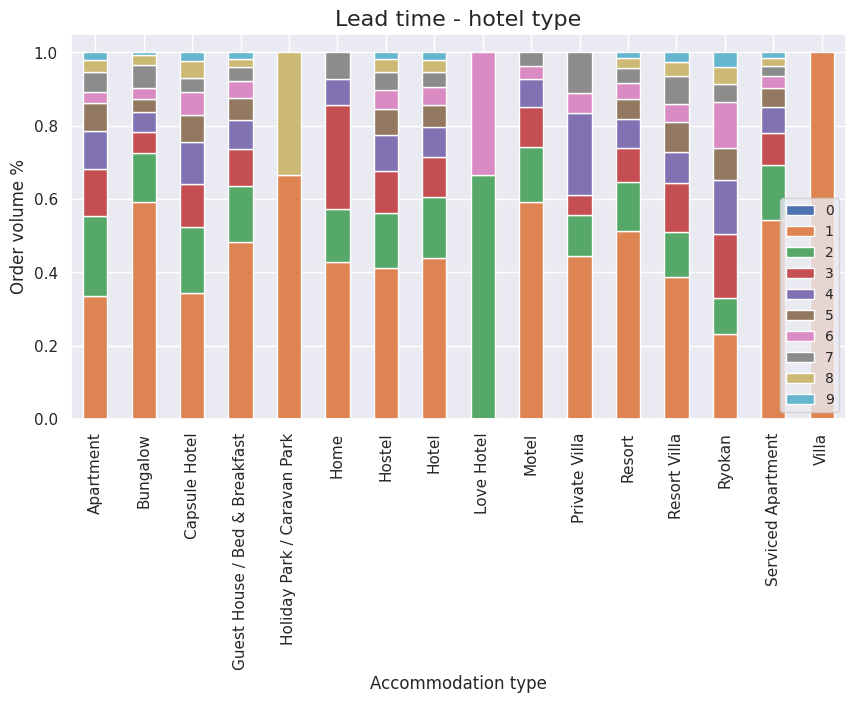

In [25]:
sns.set(style='darkgrid')
sns.set_context({"figure.figsize": (10, 5)})

pivot_df.reset_index().set_index('accommodation_type_name').plot(kind='bar', stacked=True)

plt.title('Lead time - hotel type', fontsize=16)

#add axis titles
plt.xlabel('Accommodation type')
plt.ylabel('Order volume %')
plt.legend(loc='lower right',fontsize=10)

#rotate x-axis labels
plt.xticks(rotation=90)

Several types of hotel need to be booked earlier

## whole period

In [26]:
all_df.head()

,order_id,ADR_USD,hotel_id,star_rating,accommodation_type_name,chain_hotel,booking_date,checkin_date,checkout_date,days_book_in_advance,weeks_book_in_advance,stay_nights,booking_dow,checkin_dow,city,star_type,revenue
0,0,71.06,297388,2.5,Hotel,non-chain,2016-08-02,2016-10-01,2016-10-02,60,9,1,2,6,A,low,71.06
1,1,76.56,298322,3.0,Hotel,non-chain,2016-08-02,2016-10-01,2016-10-02,60,9,1,2,6,A,medium,76.56
2,2,153.88,2313076,5.0,Hotel,chain,2016-08-02,2016-10-01,2016-10-02,60,9,1,2,6,A,high,153.88
3,3,126.60,2240838,3.5,Hotel,non-chain,2016-08-04,2016-10-02,2016-10-03,59,9,1,4,7,A,medium,126.60
4,4,115.08,2240838,3.5,Hotel,non-chain,2016-08-04,2016-10-02,2016-10-03,59,9,1,4,7,A,medium,115.08


([<matplotlib.patches.Wedge at 0x7e135a3a15a0>,
 [Text(1.0977954298629333, 0.06960742900048604, 'Apartment'),
  Text(0.9618528998974218, 0.5337031000087225, 'Capsule Hotel'),
  Text(0.5383647837131298, 0.9592514579908206, 'Guest House / Bed & Breakfast'),
  Text(0.36486620791705415, 1.0377247468959334, 'Home'),
  Text(0.1633599365334888, 1.0878021562470699, 'Hostel'),
  Text(-0.840502557078987, -0.7096164115518216, 'Hotel'),
  Text(1.0766064106673081, -0.2256515821129012, 'Love Hotel'),
  Text(1.0881396045232021, -0.1610968685856107, 'Resort'),
  Text(1.098871757108113, -0.04980824660765106, 'Ryokan'),
  Text(1.0999995301800025, -0.0010166630582186002, 'Serviced Apartment')])

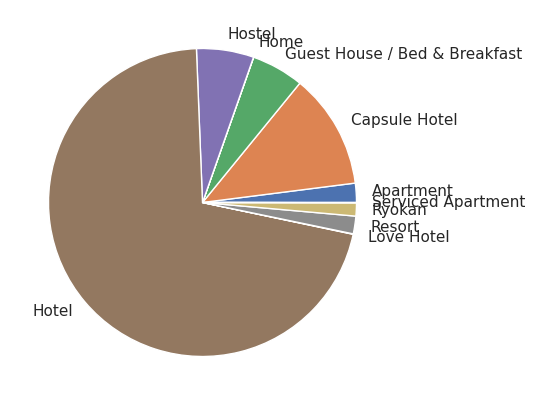

In [50]:
sns.set(style='darkgrid')
sns.set_context({"figure.figsize": (20, 5)})
city = 'C'
plt.pie(city_hotel_type[city_hotel_type['city']==city]['hotel_id_count'], labels=city_hotel_type[city_hotel_type['city']==city]['accommodation_type_name'])

# plt.title('Lead time - hotel type', fontsize=16)

# #add axis titles
# plt.xlabel('Accommodation type')
# plt.ylabel('Order volume %')
# plt.legend(loc='lower right',fontsize=10)

# #rotate x-axis labels
# plt.xticks(rotation=90)

IndexError: ignored

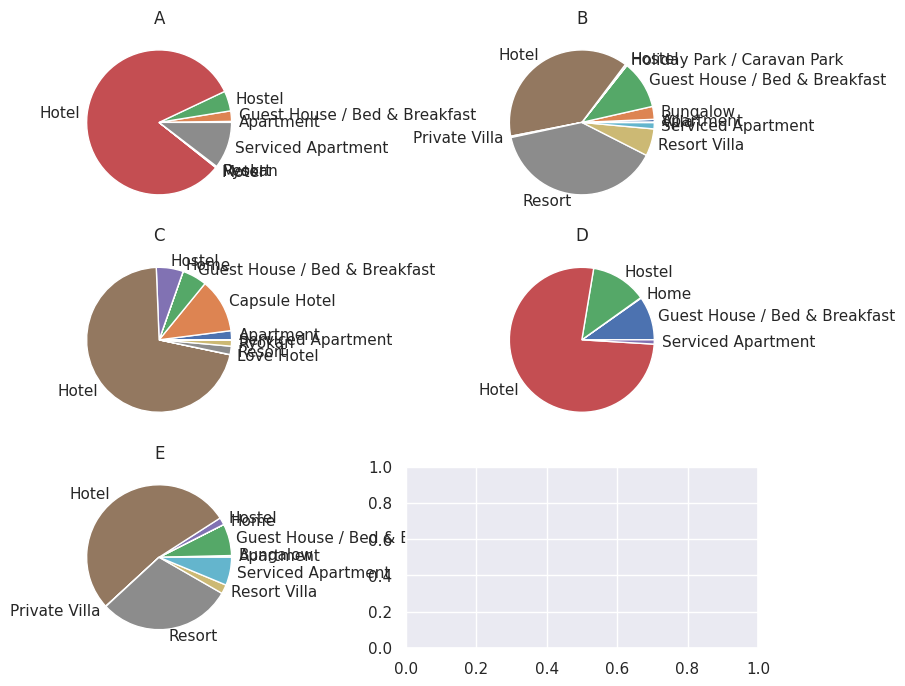

In [57]:
import matplotlib.pyplot as plt

cities = ['A','B','C','D','E']



# 创建一个子图网格，3 行 2 列，用于显示多个饼状图
fig, axs = plt.subplots(3, 2, figsize=(10, 8))

n=0
for i in range(3):
    for j in range(2):
        # 计算每个子图的索引
        index = i * 2 + j
        city = cities[n]
        n+=1
        # 创建饼状图
        axs[i, j].pie(city_hotel_type[city_hotel_type['city']==city]['hotel_id_count'], labels=city_hotel_type[city_hotel_type['city']==city]['accommodation_type_name'])
        axs[i, j].set_title(city)

# 调整布局
plt.tight_layout()

# 显示图形
plt.show()


In [30]:
groupby = ['checkin_date','city']
agg = {
    'ADR_USD':'mean'
    ,'order_id':'count'
    ,'revenue':'sum'
}

city_trend = agg_func(all_df,groupby,agg)
city_trend.head()

,checkin_date,city,ADR_USD_mean,order_id_count,revenue_sum
0,2016-10-01,A,101.374729,289,43948.30
1,2016-10-01,B,125.545956,61,13781.94
2,2016-10-01,C,223.075251,73,26986.86
3,2016-10-01,D,222.972265,181,65764.42
4,2016-10-01,E,166.845674,94,19077.46


(array([17075., 17089., 17106., 17120., 17136., 17150., 17167.]),
 [Text(17075.0, 0, '2016-10-01'),
  Text(17089.0, 0, '2016-10-15'),
  Text(17106.0, 0, '2016-11-01'),
  Text(17120.0, 0, '2016-11-15'),
  Text(17136.0, 0, '2016-12-01'),
  Text(17150.0, 0, '2016-12-15'),
  Text(17167.0, 0, '2017-01-01')])

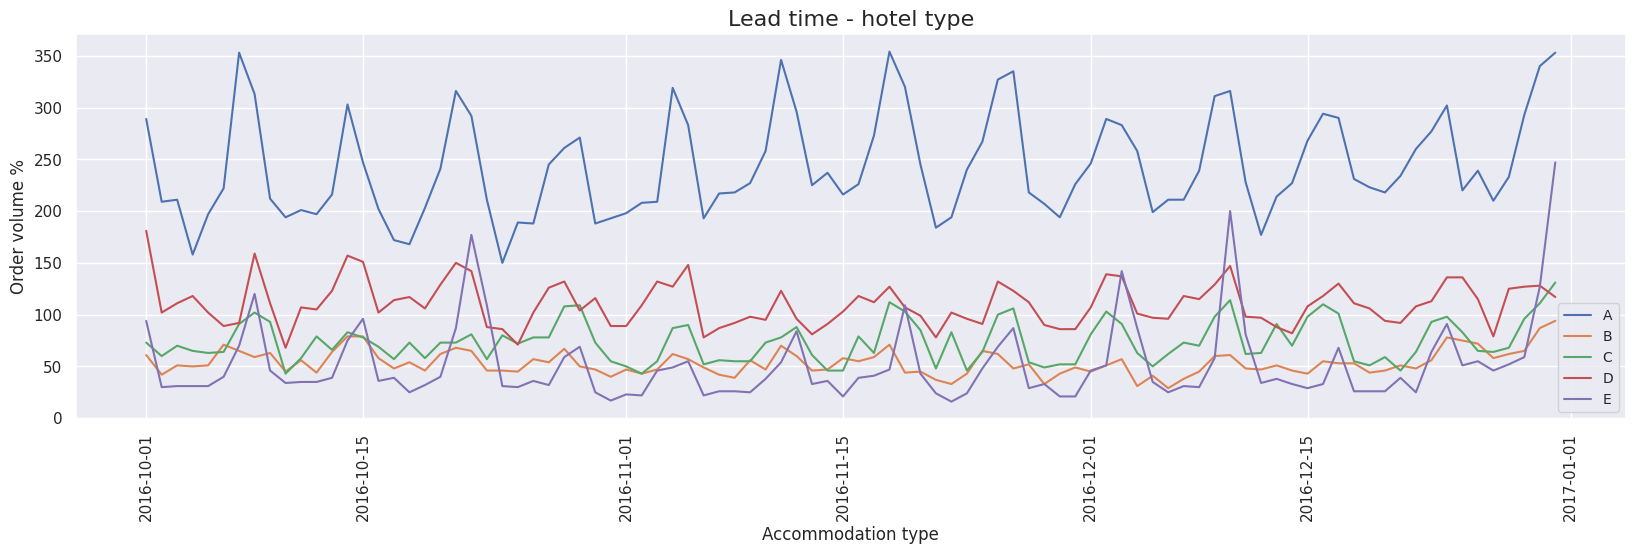

In [31]:
sns.set(style='darkgrid')
sns.set_context({"figure.figsize": (20, 5)})

sns.lineplot(data=city_trend, x='checkin_date', y='order_id_count', hue='city')

plt.title('Lead time - hotel type', fontsize=16)

#add axis titles
plt.xlabel('Accommodation type')
plt.ylabel('Order volume %')
plt.legend(loc='lower right',fontsize=10)

#rotate x-axis labels
plt.xticks(rotation=90)

E might be a tourism city

NameError: ignored

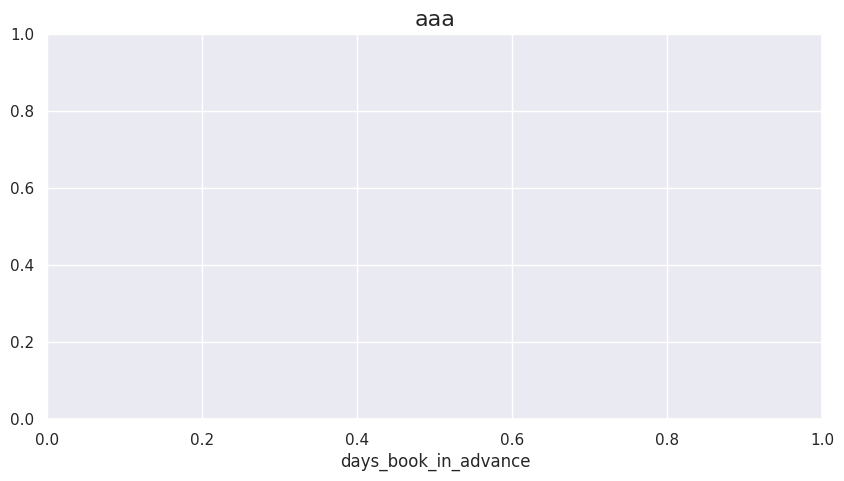

In [32]:
fig, ax2 = plt.subplots(figsize=(10,5))
sns.set_style('dark')

ax2.set_title('aaa',fontsize=16)
ax2.set_xlabel('days_book_in_advance')
ax2 = sns.barplot(data=a_cohort_df,x='days_book_in_advance',y='order_volume_pct',label='order_volume_pct')
from matplotlib.ticker import PercentFormatter
plt.gca().yaxis.set_major_formatter(PercentFormatter(1.0))
# ax2.set_xticklabels(a_cohort_df['days_book_in_advance'], rotation=90)
custom_xticks = a_cohort_df[a_cohort_df['days_book_in_advance']%5==0]['days_book_in_advance']
ax2.set_xticks(custom_xticks)

ax1 = ax2.twinx()
ax1.set_ylabel('avg_ADR_USD')
ax1 = sns.lineplot(data=a_cohort_df,x='days_book_in_advance',y='avg_ADR_USD',marker='o',color='g',label='avg_ADR_USD')
ax1.set_ylim(90,130) # to not cover the line

plt.show()

<Axes: xlabel='weeks_book_in_advance', ylabel='order_id_count_pct'>

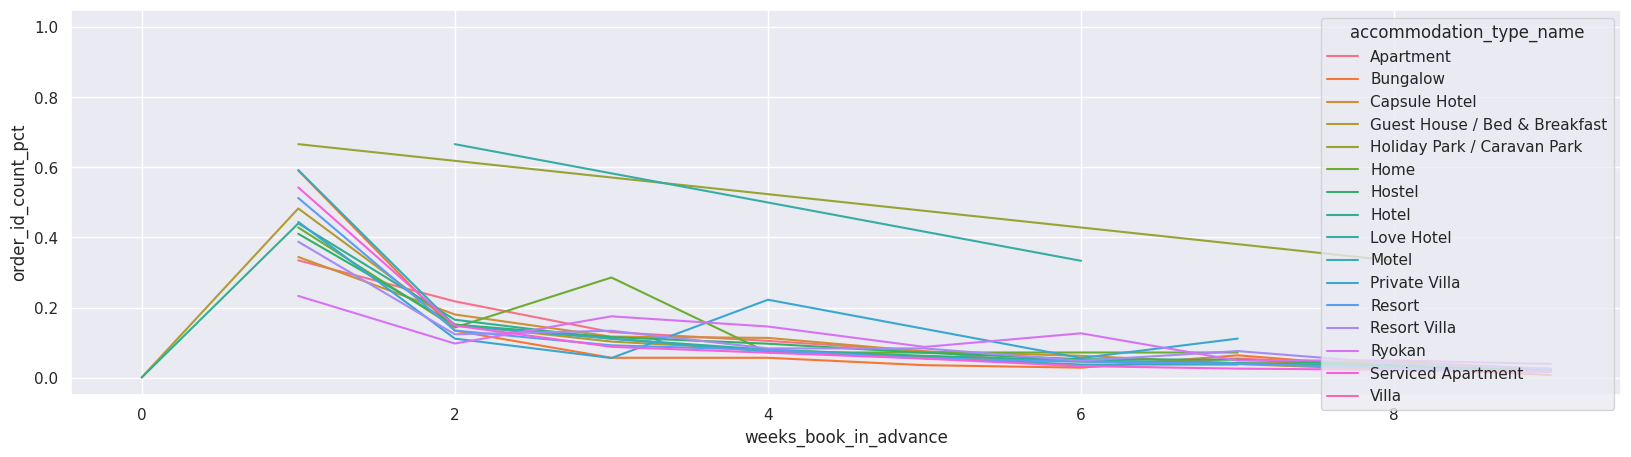

In [38]:
groupby = ['accommodation_type_name','weeks_book_in_advance']
agg = {
    'ADR_USD':'mean'
    ,'order_id':'count'
}
subgroup_pct = {
    'group':['accommodation_type_name']
    ,'percentage':{'order_id':'count'}
}
hotel_type_advance_days = agg_func(all_df,groupby,agg,subgroup_pct)


sns.set_style('darkgrid')
sns.lineplot(data=hotel_type_advance_days,x='weeks_book_in_advance',y='order_id_count_pct',hue='accommodation_type_name')

In [ ]:
a_cohort = a.groupby('days_book_in_advance').agg({'ADR_USD':'mean','#':'count'})
a_cohort_df = a_cohort.reset_index()
a_cohort_df.columns = ['days_book_in_advance','avg_ADR_USD','order_volume']
a_cohort_df

In [ ]:
# anomoly check
a[a['days_book_in_advance']==-1]

In [ ]:
a_cohort_df = a_cohort_df[a_cohort_df['days_book_in_advance']!=-1]
a_cohort_df['order_volume_pct']=a_cohort_df['order_volume']/(a_cohort_df['order_volume'].sum())
a_cohort_df

In [ ]:
sns.set_style('darkgrid')
sns.regplot(data=a_cohort_df, x="days_book_in_advance", y="avg_ADR_USD",  order = 3);


In [ ]:
fig, ax2 = plt.subplots(figsize=(10,5))
sns.set_style('dark')

ax2.set_title('aaa',fontsize=16)
ax2.set_xlabel('days_book_in_advance')
ax2 = sns.barplot(data=a_cohort_df,x='days_book_in_advance',y='order_volume_pct',label='order_volume_pct')
from matplotlib.ticker import PercentFormatter
plt.gca().yaxis.set_major_formatter(PercentFormatter(1.0))
# ax2.set_xticklabels(a_cohort_df['days_book_in_advance'], rotation=90)
custom_xticks = a_cohort_df[a_cohort_df['days_book_in_advance']%5==0]['days_book_in_advance']
ax2.set_xticks(custom_xticks)

ax1 = ax2.twinx()
ax1.set_ylabel('avg_ADR_USD')
ax1 = sns.lineplot(data=a_cohort_df,x='days_book_in_advance',y='avg_ADR_USD',marker='o',color='g',label='avg_ADR_USD')
ax1.set_ylim(90,130) # to not cover the line

plt.show()

In [ ]:
import numpy as np
cumsum = a_cohort_df['order_volume_pct'].cumsum()
n_components = np.argmax(cumsum >= 0.50) + 1
n_components

Most people book hotel when it's near the time they check in, over half customers book within 8 dyas ahead of checkin.  
As time approaching checkin date, price will decrease.  
  
So we can't use the 'price' reason to persuad customer to order soon.

# stay nights

In [ ]:
all_df.head()

In [ ]:
groupby = ['stay_nights']
agg = {
    'ADR_USD':'mean'
    ,'order_id':'count'
    ,'revenue':'sum'
}

staynights = agg_func(all_df,groupby,agg)
staynights

In [ ]:
fig = plt.subplots(figsize=(10,5))
sns.set_style('darkgrid')

sns.lineplot(data=a_stay_nights_df, x='days_book_in_advance', y='avg_ADR_USD', hue='stay_nights')

plt.show()